<a href="https://colab.research.google.com/github/naseembabu/GAN/blob/main/Sampling_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

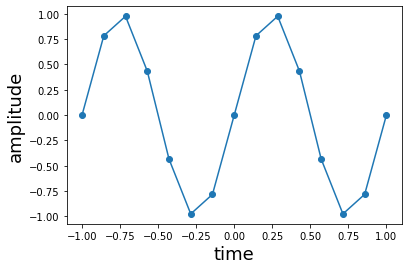

In [27]:
fig, ax = plt.subplots()

f = 1 # Hz signal frequnecy
fs = 7.0 # Hz Sampling rate (i.e. > 2*f)
t = np.arange(-1, 1+1/fs, 1/fs)
x = np.sin(2*np.pi*f*t)
ax.plot(t,x,'o-')
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.show()


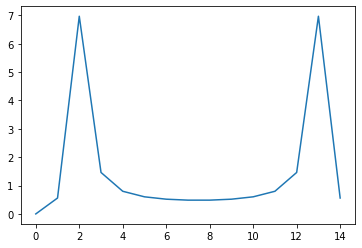

In [56]:
from scipy.fftpack import fft
yf = fft(x)
plt.plot(np.abs(yf))

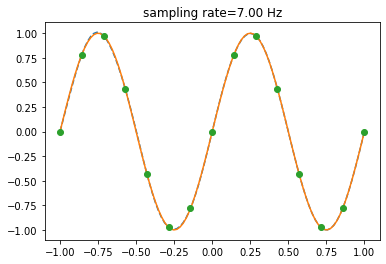

In [25]:
t = np.linspace(-1,1,100) # redefine this here for convenience
ts = np.arange(-1,1+1/fs,1/fs) # sample points
num_coeffs=len(ts) 
sm=0
for k in range(-num_coeffs,num_coeffs): # since function is real, need both sides
   sm+=np.sin(2*np.pi*(k/fs))*np.sinc( k - fs * t)
plt.plot( t,sm,'--',t,np.sin(2*np.pi*t),ts, np.sin(2*np.pi*ts),'o')
plt.title('sampling rate=%3.2f Hz' % fs )
plt.show()

In [28]:
from __future__ import print_function
%matplotlib inline

In [53]:
##number of point of the time series
nsample = 1024
## simulate a simple sinusoidal function
x1 = np.linspace(0, 100, nsample)
y=np.sin(x1)

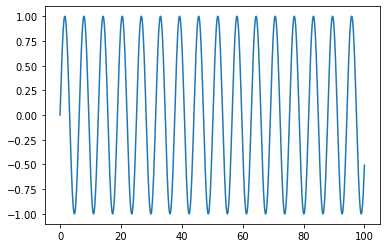

In [54]:
fig, ax = plt.subplots()
ax.plot(x1, y, label="Data")

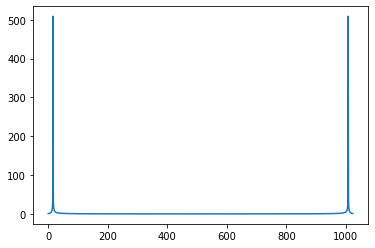

In [55]:
from scipy.fftpack import fft
yf = fft(y)
plt.plot(np.abs(yf))


Now we will add some noise.


In [41]:
sigma = 0.3
y =sigma * np.random.normal(size=nsample)

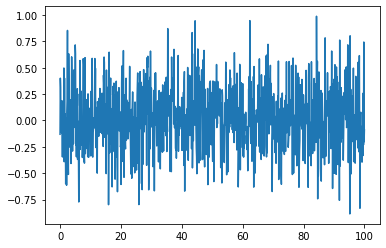

In [42]:
fig, ax = plt.subplots()
ax.plot(x1, y, label="Data")

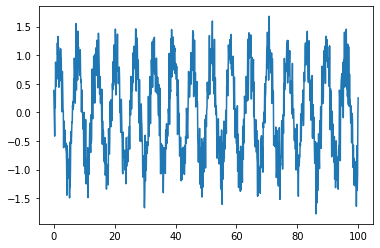

In [43]:
sigma = 0.3
y =np.sin(x1)+sigma * np.random.normal(size=nsample)
fig, ax = plt.subplots()
ax.plot(x1, y, label="Data")

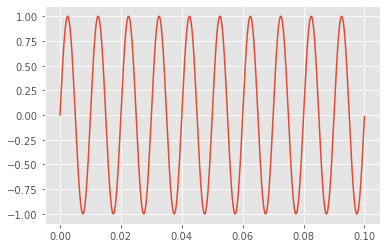

In [57]:
# sampling a sine wave programmatically
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# sampling information
Fs = 44100 # sample rate
T = 1/Fs # sampling period
t = 0.1 # seconds of sampling
N = Fs*t # total points in signal

# signal information
freq = 100 # in hertz, the desired natural frequency
omega = 2*np.pi*freq # angular frequency for sine waves

t_vec = np.arange(N)*T # time vector for plotting
y = np.sin(omega*t_vec)

plt.plot(t_vec,y)
plt.show()

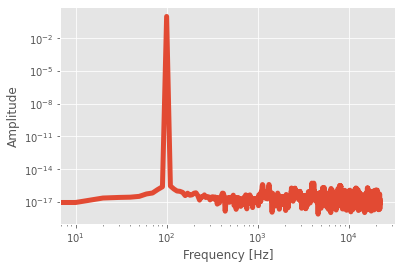

In [59]:
# fourier transform and frequency domain
#
Y_k = np.fft.fft(y)[0:int(N/2)]/N # FFT function from numpy
Y_k[1:] = 2*Y_k[1:] # need to take the single-sided spectrum only
Pxx = np.abs(Y_k) # be sure to get rid of imaginary part

f = Fs*np.arange((N/2))/N; # frequency vector

# plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=5)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()